## C1207
### 1) (4 балла) Сгенерировать поток из n различных элементов от 1 до n (можно использовать случайное перемешивание в вашем ЯП). Из него нужно выбрать равновероятный семпл из m элементов.
#### Решение: реализован SampleGenerator(sample_len), где sample_len - длина сэмпла, который и будем делать равновероятным.
### 2) (4 балла) Вес i-го элемента должен быть w_i=i (второй вариант i*i). Алгоритм обсуждали на паре.
#### Решение: реализован WeightedGenerator(sample_len, i_degree), где sample_len - длина сохраняемого  сэмпла, i_degree - степень в функкции веса i-го элемента(в этой задаче 1 или 2) 

In [83]:
import numpy as np 
from random import shuffle, random, randint
from heapq import heappush, heappop
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
## task 1
class SampleGenerator():
    
    def __init__(self, sample_len):
        self.sample = list()
        self.len_sample = sample_len
        self.counter = 0
    
    def put_element(self, new_element):
        self.counter += 1
        if len(self.sample) < self.len_sample:
            self.sample.append(new_element)
        else:
            prob = self.len_sample / (float)(self.counter + 1)
            if random() < prob:
                self.sample[randint(0, self.len_sample - 1)] = new_element
    
    def get_current_sample(self):
        return self.sample

## task 2
class WeightedGenerator():
    
    def __init__(self, sample_len, i_degree):
        self.sample = list()
        self.len_sample = sample_len
        self.counter = 0
        self.deg = i_degree
    
    def put_element(self, new_element):
        self.counter += 1
        
        prob = pow(random(), 1 / (float)(pow(new_element, self.deg)))
        
        heappush(self.sample, (prob, new_element))
        if len(self.sample) > self.len_sample:
            heappop(self.sample)
    
    def get_current_sample(self):
        return [el[1] for el in self.sample]

### Генерируем stream, шаффлим его, подаем его элементы написанному генератору, который будет оставлять равновероятный сэмпл. Повторяем процесс не менее 1000 раз.

In [85]:
def run_experiment(stream_len, sample_len, num_of_iters, is_weighted=False, i_degree=1):
    result = []
    for i in xrange(num_of_iters):
        stream = range(1, stream_len + 1)
        shuffle(stream)
        if is_weighted:
            generator = WeightedGenerator(sample_len, i_degree)
        else:
            generator = SampleGenerator(sample_len)
        
        for element in stream:
            generator.put_element(element)
        result.extend(generator.get_current_sample())
    
    #drawing resulting hist
    fig = plt.figure(figsize=(16 ,5))
    plt.title('Stream_len: {}, Sample_len: {}, Number of iterations: {}'.format(stream_len, sample_len, num_of_iters))
    plt.hist(result, bins=100)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

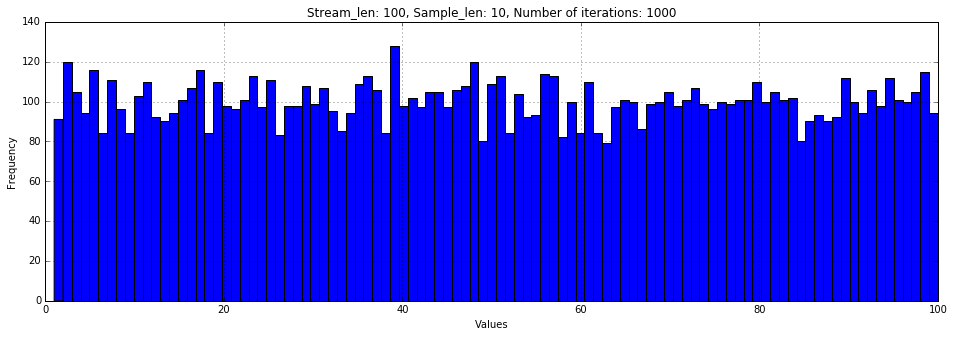

In [86]:
run_experiment(100,10,1000)

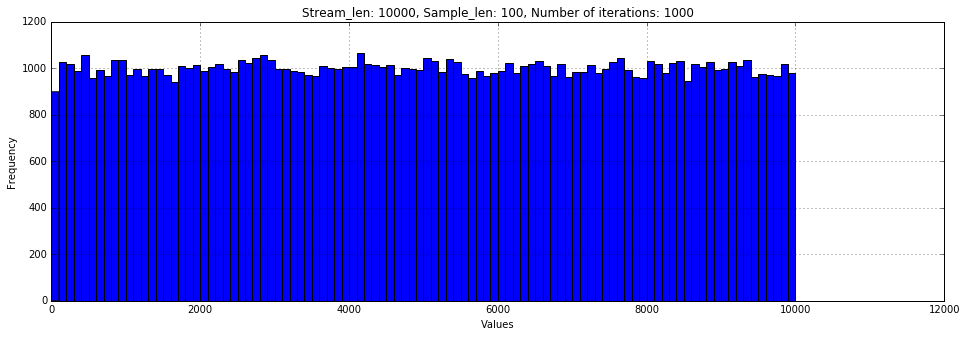

In [87]:
run_experiment(10000,100,1000)

#### Наблюдаем ожидаемое: при больших значениях длины потока и выбираемого сэмпла, сэмпл получается более равновероятным

### WeightedGenerator с w_i = i:

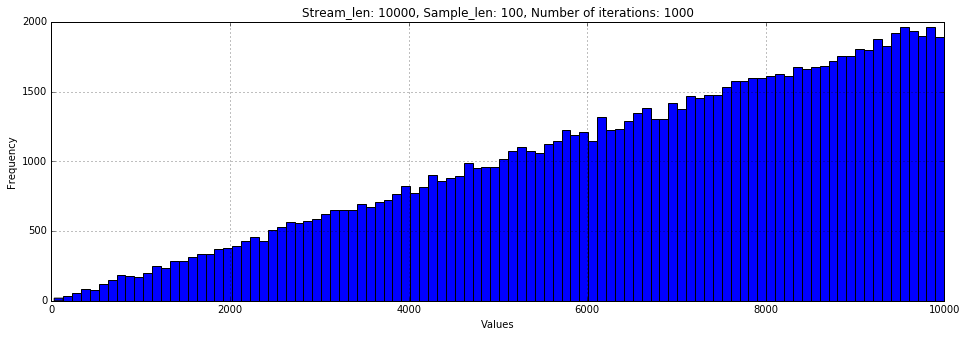

In [94]:
run_experiment(10000,100,1000, True, 1)

### WeightedGenerator с w_i = i^2:

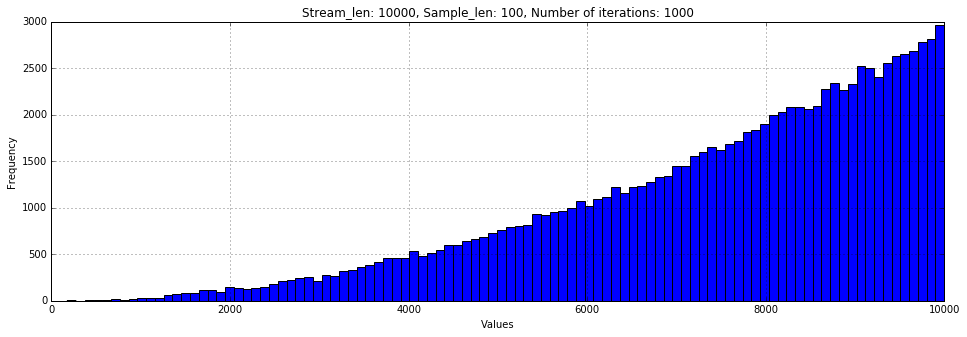

In [95]:
run_experiment(10000,100,1000, True, 2)

#### Неплохо прослеживается линейная и квадратичная зависимости
####  Ради интереса можно выбрать w_i = 1, и еще раз удостовериться в корректности реализации 

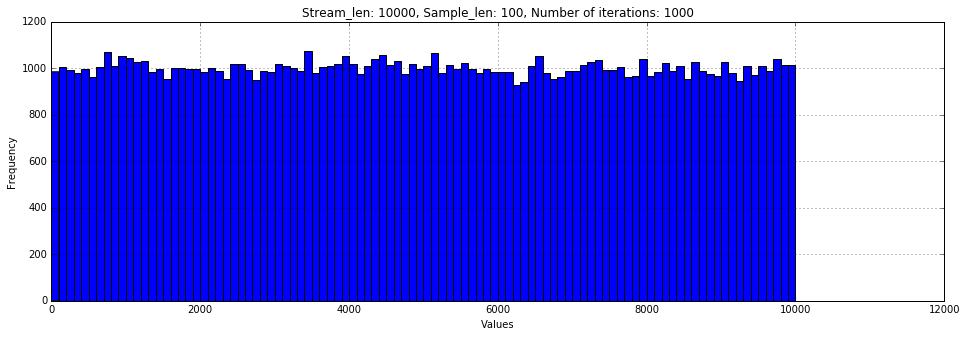

In [96]:
run_experiment(10000,100,1000, True, 0)